#  Dẫn dắt vấn đề

- Để thiết kế một toà nhà hiệu quả, việc tính toán Heating Load và Cooling load để xác định thông số kỹ thuật của thiết bị sưởi và thiết bị làm mát để người sử dụng có một cảm giác thoải mái khi ở nhà. Để ước tính công suất làm mát và công suất sưởi, các kỹ sư thiết kế cần phải có thông tin về đặc điểm của toà nhà và không gian điều hoà. Vì lý do này nhóm chúng em khảo sát 8 biến đầu vào : `Relative_Compactness`	,`Surface_Area`,	`Wall_Area`,	`Roof_Area`,	`Overall_Height`,	`Orientation Glazing_Area`,	`Glazing_Area_Distribution` để ước tính ra 	`Heating_Load` và	`Cooling_Load` 


- Để đánh giá hiệu suất của mô hình, nhóm chúng em sử dụng hệ số xác định (coefficent of determination) R2_score. R2 có giá trị nằm trong khoảng [0,1] là một thước đo thống kê về mức độ gần của dữ liệu với đường hồi quy, điều này rất quan trọng để tạo ra các dự đoán gần với giá trị thực. Bài tập lần này mong muốn đạt được giá trị R2 càng cao thì mô hình càng phù hợp với dữ liệu

# I. Tìm hiểu về bộ data

Tập dữ liệu bao gồm 768 mẫu và 8 features, nhằm dự đoán 2 giá trị Heating Load và Cooling Load. 

## Dataset

energy_efficiency_data.csv

## Load thư viện

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load dataset

In [8]:
data=pd.read_csv(r'C:\Users\Thanh Long\Desktop\AI\BLT_AI2\energy_efficiency_data.csv')

In [9]:
data.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Nhận thấy bộ data không bị thiếu giá trị nào ở mọi features

## Data Exploration

### Data Correlation 

In [11]:
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
data.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
Relative_Compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
Surface_Area,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
Wall_Area,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
Roof_Area,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
Overall_Height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
Orientation,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
Glazing_Area,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
Glazing_Area_Distribution,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Heating_Load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Cooling_Load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


Bảng Data Correlation cho thấy mối liên quan giữa các feature

<Figure size 360x360 with 0 Axes>

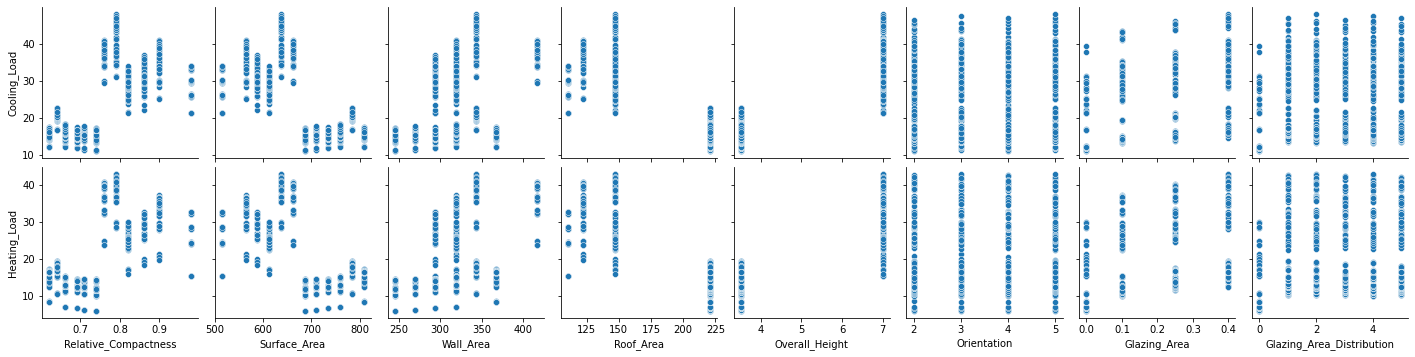

In [12]:
# Correlation between inputs and outputs
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['Cooling_Load','Heating_Load'],
             x_vars=['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                     'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution',])
plt.show()

## Data Preprocessing

### Data Selection

Mục đích của bài tập này là làm cho giá trị R2 càng lớn càng tốt, giá trị R2 sẽ tăng lên khi thêm các feature. Để có R2 cao, nhóm chúng em chọn tất cả 8 feature

In [13]:
data.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


Chuẩn hoá các giá trị trong feature bằng Normalize

In [14]:
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)

X = data.drop(['Heating_Load','Cooling_Load'], axis=1)
X = nr.fit_transform(X)
y = data[['Heating_Load','Cooling_Load']]

## E. Data Modelling

Chia tập dữ liệu thành 2 phần `train` và `test` với tỷ lệ 80-20

In [15]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Tạo hàm đánh giá giá trị R2 với từng mô hình

In [16]:
#Create model evaluation function
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score

Nhóm sử dụng các thuật toán dựa trên cây để đưa ra mô hình tốt nhất với bộ dữ liệu. Nhóm sử dụng 2 mô hình cơ bản và sau đó tối ưu hoá mô hình. Hai mô hình được chọn là
1. Decision Tree Regression
2. Random Forest Regression

### Decission Tree Regression

In [17]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=123)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test)

In [18]:
#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test, y_test)

R2 score = 0.955


##### Hiển thị trực quan giá trị dự đoán và thực tế trước khi tối ưu

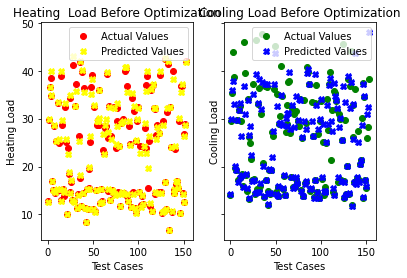

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [19]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (10,10))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (10,10))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

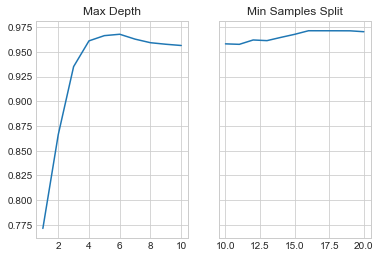

In [20]:
# Finding the best decision tree optimization parameters
plt.style.use('seaborn-whitegrid')
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min Samples Split
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=123, min_samples_split=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

plt.show()

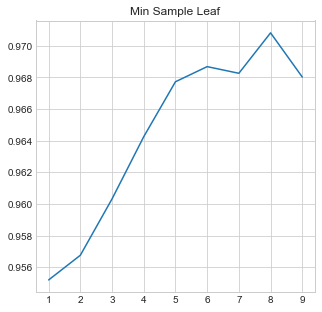

In [21]:
#Min Sample Leaf
plt.figure(figsize = (5,5))
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=123, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))

plt.plot(dt_samples_leaf,dt_acc)
plt.title('Min Sample Leaf')

plt.show()

Nhóm chọn ra một số index của 3 parameter `Max_Depth`,`Min Samples Split`,`Min Sample Leaf`, qua `GridSearchCV` để tìm ra những index mang lại giá trị R2 lớn nhất cho mô hình

In [22]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}


#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'max_depth': [7, 8, 9], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [16, 17, 18]})

In [23]:
#Đưa ra index tốt nhất cho từng tham số
dt_random.best_params_

{'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 18}

In [24]:
# Predicted value
y_pred1_ = dt_random.best_estimator_.predict(X_test)

In [25]:
#R2 score after optimization
dt_best_random = dt_random.best_estimator_
R2_after_dt= evaluate(dt_best_random, X_test, y_test)

R2 score = 0.971


##### Plot giá trị dự đoán và thực tế sau khi tối ưu

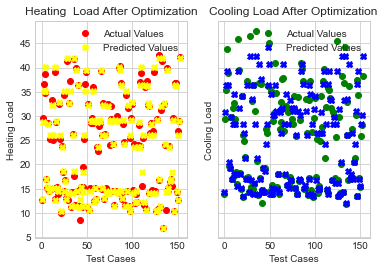

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (10,10))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred1_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (10,10))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred1_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

### Random Forest Regression

In [27]:
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create random forest model 
rf_model = RandomForestRegressor(random_state=123)
# Apply the model
rf_model.fit(X_train, y_train)
# Predicted value
y_pred2 = rf_model.predict(X_test)

In [28]:
#Giá trị R2 trước khi tối ưu
R2_before_rf= evaluate(rf_model, X_test, y_test)

R2 score = 0.972


##### Plot giá trị dự đoán và thực tế trước khi tối ưu

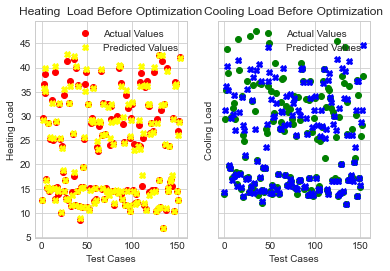

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (10,10))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred2[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (10,10))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred2[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

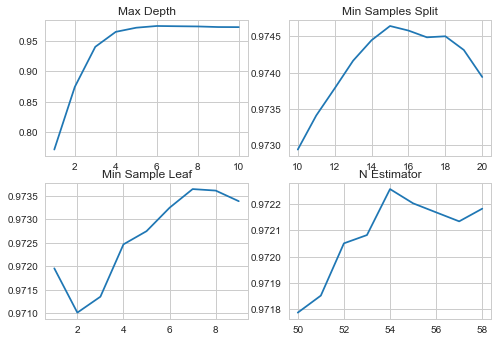

In [46]:
# Finding the best random forest optimization parameters
f, axarr = plt.subplots(2, 2)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 5 
plt.style.use('seaborn-notebook')
# Max Depth
rf_acc = []
rf_depth = range(1,11)
for i in rf_depth:
    rf = RandomForestRegressor(random_state=123, max_depth=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 0].plot(rf_depth,rf_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
rf_acc = []
rf_samples_split = range(10,21)
for i in rf_samples_split:
    rf = RandomForestRegressor(random_state=123, min_samples_split=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 1].plot(rf_samples_split,rf_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
rf_acc = []
rf_samples_leaf = range(1,10)
for i in rf_samples_leaf:
    rf = RandomForestRegressor(random_state=123, min_samples_leaf=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 0].plot(rf_samples_leaf,rf_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=123, n_estimators=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 1].plot(rf_estimators,rf_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [32]:
# Random forest optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6,7,8],
              'min_samples_split': [14,15,16],
              'min_samples_leaf' : [6,7,8],
              'n_estimators': [53,54,55]}


#Create new model using the GridSearch
rf_random = GridSearchCV(rf_model, parameters, cv=10)

#Apply the model
rf_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [14, 15, 16],
                         'n_estimators': [53, 54, 55]})

In [33]:
#View the best parameters
rf_random.best_params_

{'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'n_estimators': 53}

In [34]:
# Predicted value
y_pred2_ = rf_random.best_estimator_.predict(X_test)

In [35]:
#Giá trị R2 sau khi tối ưu
best_random_rf = rf_random.best_estimator_
R2_after_rf= evaluate(best_random_rf, X_test, y_test)

R2 score = 0.974


##### Plot giá trị dự đoán và thực tế sau khi tối ưu

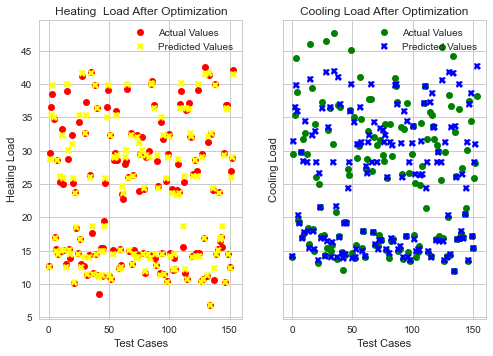

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [47]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
plt.style.use('seaborn-notebook')
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test)),y_pred2_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test)),y_pred2_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

## Evaluation

 * R2_score của `Decision Tree Regression` là 0.955
 * R2_score của `Random Forest Regression` là 0.972

Sau khi điều chỉnh các tham số bằng GridSearch ta có:

 * R2_score của `Decision Tree Regression` là 0.971
 * R_2_score của `Random Forest Regression` là 0.974
 
Từ đó ta thấy được mô hình Random Forest Regression mang lại dự đoán tốt hơn cho bộ dữ liệu